In [114]:
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt




In [115]:
# # Set pandas options to display all columns and rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

In [116]:
years = ['2021', '2022', '2023', '2024']
races = ['TOR330', 'TOR450', 'TOR130']

## Looping through scraped data from 100X100trail

In [117]:
races = ['TOR330'
        # ,'TOR450'
        ]
# years = ['2023']

TORX_df = {}

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/100x100trail/aid_station_{race}_{year}.xlsx',
                                 dtype={'Start Date': 'string',
                                        'Year': 'string'})
        print(f'{race}_{year} {df.shape}')
        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50)
        
#         print(f"Data read from f'{race}_{year}.xlsx'")


TOR330_2021 (28600, 10)
TOR330_2022 (34940, 10)
TOR330_2023 (42964, 10)
TOR330_2024 (39181, 10)
**************************************************


In [118]:
TORX_df_concat = pd.concat(TORX_df)

In [119]:
# TOR330 = TORX_df_concat[TORX_df_concat['Year'] == '2023']
TOR330 = TORX_df_concat.copy().reset_index(drop = True)
TOR330.head()

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status
0,Colle Franco,1,M,IT,TOR330,2021,V1,660 - FINISH 330|349.3|30879,2021-09-15T04:43:57+00:00,True
1,Colle Franco,1,M,IT,TOR330,2021,V1,650 - Mont de la Saxe 130|133.7|12388,2021-09-15T04:04:48+00:00,True
2,Colle Franco,1,M,IT,TOR330,2021,V1,630 - Rif. Frassati 130|118.9|11422,2021-09-15T01:19:06+00:00,True
3,Colle Franco,1,M,IT,TOR330,2021,V1,620 - Bosses 130|109.8|10210,2021-09-14T23:19:05+00:00,True
4,Colle Franco,1,M,IT,TOR330,2021,V1,610 - Ponteille Desot 330|308.9|28045,2021-09-14T21:59:00+00:00,True


### DUV and ITRA data

In [121]:
    TORX_duv_df = pd.read_excel(f'Database Data/TORX_duv_df.xlsx',
                                     dtype={'Start Date': 'string',
                                            'Year': 'string'})

    TORX_itra_no_DNF = pd.read_excel(f'Database Data/TORX_itra_no_DNF.xlsx',
                                     dtype={'Start Date': 'string',
                                           'Year': 'string'})

In [137]:
def find_out_the_rows_difference_between_datasets(df):
    for year in years :
        for race in races:
            print(' - ',race, year)
            print('ITRA rows: ', TORX_itra_no_DNF[(TORX_itra_no_DNF['Year'] == year) &
                              (TORX_itra_no_DNF['Race'] == race)].shape[0])
            print('DUV rows: ',TORX_duv_df[(TORX_duv_df['Year'] == year) &
                              (TORX_duv_df['Race'] == race)].shape[0])
            print('TOR330 rows: ',df[(df['Year'] == year) &
                          (df['Race'] == race) &
                              (df['Status'] == True)].shape[0])
        print('\n', '*'*20)
        
    print(' - ','TOR330','2022')
    print(TORX_itra_no_DNF[(TORX_itra_no_DNF['Race'] == 'TOR330') &
                          (TORX_itra_no_DNF['Year'] == '2022')].groupby(['Status'])['Status'].count())
    print('\n', '*'*20)


In [138]:
find_out_the_rows_difference_between_datasets(TORX_df_concat)

 -  TOR330 2021
ITRA rows:  431
DUV rows:  431
TOR330 rows:  23001

 ********************
 -  TOR330 2022
ITRA rows:  590
DUV rows:  408
TOR330 rows:  20017

 ********************
 -  TOR330 2023
ITRA rows:  621
DUV rows:  621
TOR330 rows:  33721

 ********************
 -  TOR330 2024
ITRA rows:  533
DUV rows:  533
TOR330 rows:  27976

 ********************
 -  TOR330 2022
Status
Finished                        408
Finished at Bosses               81
Finished at Rifugio Frassati    101
Name: Status, dtype: int64

 ********************


### Exploring whether RITIRIO is the same as FALSE

In [124]:
retired_but_with_status_true = TOR330[(TOR330['Place'].str.contains('RITIRO')) &
       (TOR330['Status'] == True)]

list_of_names_retired_but_with_status_true  = list(retired_but_with_status_true['Name'].unique())

retired_but_with_status_true 

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status
21955,Mcdermott David,668,M,US,TOR330,2021,V3,360 - Niel - La Gruba 330|199.7|17166 - RITIRO,2021-09-15T23:37:31+00:00,True
63613,Verjee Sabrina,48,F,GB,TOR330,2023,V1,290 - Donnas IN 330 - RITIRO,2023-09-11T14:00:51+02:00,True
65921,Brumana Andrea,62,M,IT,TOR330,2023,V1,520 - Rif. Magià 330 - RITIRO,2023-09-13T10:28:07+02:00,True
70807,Hartmuth Katharina,665,F,CH,TOR330,2023,SEN,290 - Donnas IN 330 - RITIRO,2023-09-11T14:00:58+02:00,True
72441,Smith Jonathan,1321,M,AU,TOR330,2023,V2,291 - Donnas OUT 450 - RITIRO,2023-09-12T17:18:56+02:00,True
95929,Houteer Magni Justine,275,F,FR,TOR330,2023,V1,381 - Gressoney OUT 330 - RITIRO,2023-09-14T01:33:04+02:00,True
115123,Hutchinson G Brian,1013,M,IE,TOR330,2024,V2,620 - Bosses 330 - RITIRO,2024-09-13T06:21:34+02:00,True
115815,Cagna Andrea,1547,M,IT,TOR330,2024,V1,201 - Cogne OUT 450 - RITIRO,2024-09-10T06:52:37+02:00,True


In [125]:
# How many have 'RITIRIO
TOR330[TOR330['Place'].str.contains('RITIRO')].shape

(437, 10)

In [126]:
# How many have not finished
len(list(TOR330['Name'][TOR330['Status'] == False].unique()))

1628

### Cleaning Place column

In [127]:
TOR330['Place'].unique()

array(['660 - FINISH 330|349.3|30879',
       '650 - Mont de la Saxe 130|133.7|12388',
       '630 - Rif. Frassati 130|118.9|11422',
       '620 - Bosses 130|109.8|10210',
       '610 - Ponteille Desot 330|308.9|28045',
       '590 - Rif. Champillon 330|303.5|27681',
       '581 - Ollomont OUT330|298.5|26602',
       '580 - Ollomont 330 IN|298.5|26602',
       '570 - Berio Damon 130|83.7|8089', '550 - Oyace 330|285.1|25038',
       '540 - Biv. R. Clermont 130|63.6|6242',
       '530 - Rif. Cuney 130|58.9|5762',
       '520 - Rif. Magià 330|266.6|23540',
       '490 - Rif. Barmasse 330|252.8|22390',
       '481 - Valtournenche OUT 330|248.2|21547',
       '480 - Valtournenche 130 IN|33.1|3247\\t',
       '470 - Rif. Grand Tournalin 330|239.1|21172',
       '460 - Champoluc 330|230.8|20019',
       '450 - Rif. Alpenzu 130|3.6|526',
       '381 - Gressoney 330 OUT|213.4|18300',
       '380 - Gressoney 330 IN|213.4|18300', '370 - Loo|206|18063',
       '360 - Niel - La Gruba 330|199.7|1716

In [128]:
TOR330['aid_stations'] = TOR330['Place'].str.split(r'^\d+ - ').str.get(-1)

TOR330['aid_stations'] = TOR330['aid_stations'].str.replace(r'\d+', '', regex=True)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split('|').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')
TOR330['aid_stations'] = TOR330['aid_stations'].str.strip()

TOR330['RITIRIO'] = np.where(
    TOR330['aid_stations'].str.contains('RITIRO', na=False), 
    TOR330['aid_stations'],  '')
# TOR330['RITIRIO] =TOR330['RITIRIO].str.replace('- RITIRO', '')
TOR330['aid_stations'] = TOR330['aid_stations'].str.split(' - RITIRO').str.get(0)
TOR330['aid_stations'].unique()

C:\Users\Karina\AppData\Local\Temp\ipykernel_3092\3056331615.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
C:\Users\Karina\AppData\Local\Temp\ipykernel_3092\3056331615.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')


array(['FINISH', 'Mont de la Saxe', 'Rifugio Frassati', 'Bosses',
       'Ponteille Desot', 'Rifugio Champillon', 'Ollomont OUT',
       'Ollomont  IN', 'Berio Damon', 'Oyace', 'Bivacco R. Clermont',
       'Rifugio Cuney', 'Rifugio Magià', 'Rifugio Barmasse',
       'Valtournenche OUT', 'Valtournenche  IN',
       'Rifugio Grand Tournalin', 'Champoluc', 'Rifugio Alpenzu',
       'Gressoney  OUT', 'Gressoney  IN', 'Loo', 'Niel - La Gruba',
       'Col della Vecchia', 'Lago Chiaro', 'Rifugio della Balm a',
       'Rifugio Coda', 'Sassa', 'Perloz', 'Donnas  OUT', 'Donnas  IN',
       'Pontboset', 'Chardonney', 'Rifugio Dondena', 'Sogno', 'Goilles',
       'Cogne  OUT', 'Cogne  IN', 'Rifugio Sella', 'Eaux Rousse',
       'Rhemes-Notre-Dame', 'Chalet Epee', 'Valgrisenche OUT',
       'Valgrisenche IN', 'Promoud', 'Rifugio Deffeyes', 'La Thuile',
       'Baite Youlaz', 'START', '', 'FINISH - UHF',
       'Pas Entre Deux Sauts', 'Bruson Arp', 'Vareton', 'Planaval',
       'START - MANUAL', '

In [129]:
# dropping rows with PETTORALI
TOR330 = TOR330[~(TOR330['Place'].str.contains('PETTORALI'))].reset_index(drop=True)

In [130]:
TOR330[~(TOR330['RITIRIO'] == '')].head()

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO
62071,Antonelli Davide,149,M,IT,TOR330,2022,SEN,010 - START - RITIRO,2022-09-15T16:26:11+00:00,False,START,START - RITIRO
62088,Begnis Andrea,66,M,IT,TOR330,2022,SEN,010 - START - RITIRO,2022-09-15T16:26:04+00:00,False,START,START - RITIRO
63478,Galea Eric,1228,M,FR,TOR330,2022,V2,010 - START - RITIRO,2022-09-15T16:25:06+00:00,False,START,START - RITIRO
63484,Hinman Martin,1345,M,GB,TOR330,2022,V1,010 - START - RITIRO,2022-09-15T16:24:56+00:00,False,START,START - RITIRO
63611,Verjee Sabrina,48,F,GB,TOR330,2023,V1,290 - Donnas IN 330 - RITIRO,2023-09-11T14:00:51+02:00,True,Donnas IN,Donnas IN - RITIRO


In [131]:
TOR330['RITIRIO'].unique()

array(['', 'START - RITIRO', 'Donnas IN  - RITIRO',
       'Rifugio Magià  - RITIRO', 'Donnas OUT  - RITIRO',
       'Gressoney OUT  - RITIRO', 'Ollomont OUT  - RITIRO',
       'Ollomont IN  - RITIRO', 'Lago Chiaro - RITIRO',
       'Oyace IN  - RITIRO', 'Valtournenche OUT  - RITIRO',
       'Champoluc  - RITIRO', 'Sassa - RITIRO',
       'Rifugio della Barma  - RITIRO', 'Gressoney IN  - RITIRO',
       'Niel La Gruba  - RITIRO', 'Col della Vecchia - RITIRO',
       'Chardonney - RITIRO', 'Valgrisenche OUT - RITIRO',
       'Rifugio Dondena  - RITIRO', 'Goilles - RITIRO',
       'Cogne OUT  - RITIRO', 'Cogne IN  - RITIRO',
       'Rifugio Sella  - RITIRO', 'Eaux Rousse - RITIRO',
       'Rhemes-Notre-Dame - RITIRO', 'Chalet Epee - RITIRO',
       'Valgrisenche IN - RITIRO', 'La Thuile - RITIRO',
       'Baite Youlaz - RITIRO', 'Bosses  - RITIRO',
       'Rifugio Champillon  - RITIRO', 'Pontboset - RITIRO',
       'Planaval - RITIRO'], dtype=object)

### Reading in TORX dates extracted from DUV

In [132]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    
dates_duv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes


### Cleaning Time column

Column '2024-09-11T07:08:32+02:00' needs to be fixed into '2024-09-11 07:08:32' and turned into the datetime

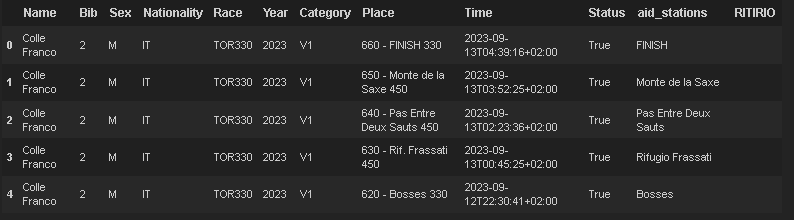

In [133]:
# 2024-09-11T07:08:32+02:00

# Split the 'Time' column to remove the timezone offset
TOR330['new_Time'] = TOR330['Time'].str.split('+').str[0]

# Convert the cleaned time string to a datetime object
TOR330['new_Time'] = pd.to_datetime(TOR330['new_Time'])

# # Add the 2-hour offset using timedelta
# # NO NEED!!!
# TOR330['new_Time'] = TOR330['new_Time'] + pd.to_timedelta('02:00:00')

# Preview the DataFrame
TOR330.head()

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO,new_Time
0,Colle Franco,1,M,IT,TOR330,2021,V1,660 - FINISH 330|349.3|30879,2021-09-15T04:43:57+00:00,True,FINISH,,2021-09-15 04:43:57
1,Colle Franco,1,M,IT,TOR330,2021,V1,650 - Mont de la Saxe 130|133.7|12388,2021-09-15T04:04:48+00:00,True,Mont de la Saxe,,2021-09-15 04:04:48
2,Colle Franco,1,M,IT,TOR330,2021,V1,630 - Rif. Frassati 130|118.9|11422,2021-09-15T01:19:06+00:00,True,Rifugio Frassati,,2021-09-15 01:19:06
3,Colle Franco,1,M,IT,TOR330,2021,V1,620 - Bosses 130|109.8|10210,2021-09-14T23:19:05+00:00,True,Bosses,,2021-09-14 23:19:05
4,Colle Franco,1,M,IT,TOR330,2021,V1,610 - Ponteille Desot 330|308.9|28045,2021-09-14T21:59:00+00:00,True,Ponteille Desot,,2021-09-14 21:59:00


### PIVOTING the Dataset

In [144]:
# Pivot the data so that each participant has its own column
pivoted_TOR330 = TOR330.pivot_table(
    index=['Name','Bib', 'Sex', 
           'Nationality', 'Category', 'Race','Year', 'Status'# , 'RITIRIO'
          ],
    columns='aid_stations',  
    values='new_Time',
    aggfunc='first'  # Ensures only the first match is kept in case of duplicates
).reset_index()

pivoted_TOR330.head()

aid_stations,Name,Bib,Sex,Nationality,Category,Race,Year,Status,,Baite Youlaz,...,START - MANUAL,Sassa,Sogno,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche IN,Valtournenche OUT,Valtournenche OUT,Vareton
0,Aakre Eivind,1325,M,NO,V2,TOR330,2022,False,NaT,2022-09-11 15:12:45,...,NaT,NaT,NaT,2022-09-12 02:43:23,2022-09-12 04:12:59,NaT,NaT,NaT,NaT,NaT
1,Abbet Jean-Maurice,781,M,CH,V2,TOR330,2021,True,2021-09-11 17:37:28,2021-09-12 15:01:48,...,NaT,2021-09-14 22:44:39,2021-09-14 04:59:48,2021-09-13 01:02:43,2021-09-13 03:15:58,2021-09-16 10:33:15,NaT,2021-09-16 15:56:41,NaT,2021-09-16 19:30:08
2,Abbet Valentin,311,M,CH,SEN,TOR330,2021,True,2021-09-11 17:38:10,2021-09-12 12:40:48,...,NaT,2021-09-14 22:44:58,2021-09-14 04:59:31,2021-09-12 22:30:51,2021-09-13 03:16:03,2021-09-16 10:33:25,NaT,2021-09-16 15:56:56,NaT,2021-09-16 19:29:51
3,Abe Hiroshi,374,M,JP,V1,TOR330,2024,False,NaT,2024-09-08 13:03:31,...,NaT,2024-09-11 04:02:41,NaT,2024-09-09 00:43:19,2024-09-09 04:15:35,NaT,NaT,NaT,NaT,NaT
4,Abe Takashi,443,M,JP,V1,TOR330,2023,True,NaT,2023-09-10 12:32:30,...,NaT,2023-09-12 20:07:44,NaT,2023-09-10 22:29:16,2023-09-11 01:27:00,NaT,2023-09-14 11:20:43,2023-09-14 16:38:25,NaT,2023-09-14 19:55:33


In [145]:
find_out_the_rows_difference_between_datasets(pivoted_TOR330)

 -  TOR330 2021
ITRA rows:  431
DUV rows:  431
TOR330 rows:  432

 ********************
 -  TOR330 2022
ITRA rows:  590
DUV rows:  408
TOR330 rows:  408

 ********************
 -  TOR330 2023
ITRA rows:  621
DUV rows:  621
TOR330 rows:  630

 ********************
 -  TOR330 2024
ITRA rows:  533
DUV rows:  533
TOR330 rows:  535

 ********************
 -  TOR330 2022
Status
Finished                        408
Finished at Bosses               81
Finished at Rifugio Frassati    101
Name: Status, dtype: int64

 ********************


### RITIRIO
Issues with retired because there are both blanks and ' - Ritirio' for each person

In [146]:
ritirio_df = TOR330[~(TOR330['RITIRIO'] == '')]
# Merge the datsets back after pivoting
pivoted_TOR330 = pivoted_TOR330.merge(
    ritirio_df[['Bib', 'RITIRIO']].drop_duplicates(),  # Ensure no duplicates in 'Bib' and 'RITIRIO'
    on='Bib',
    how='left'
)

# reordering columns 
pivoted_TOR330 = pivoted_TOR330[[
'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', 'RITIRIO',  
'START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Bivacco Zappelli',
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
    'Eaux Rousse', 'Rifugio Sella', 'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 
    'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo',
    'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 
    'Oyace IN', 'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN', 
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 
    'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH']]

pivoted_TOR330.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,RITIRIO,START,...,Berio Damon,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Aakre Eivind,1325,M,NO,2022,TOR330,V2,False,NaN,2022-09-11 11:21:45,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,Abbet Jean-Maurice,781,M,CH,2021,TOR330,V2,True,NaN,2021-09-12 11:33:44,...,2021-09-17 11:53:50,NaT,2021-09-17 14:16:26,2021-09-17 17:29:02,2021-09-17 19:44:15,2021-09-17 23:12:57,2021-09-18 02:43:04,2021-09-18 07:04:39,NaT,NaT
2,Abbet Valentin,311,M,CH,2021,TOR330,SEN,True,NaN,2021-09-11 20:20:55,...,2021-09-17 11:54:00,NaT,2021-09-17 14:16:25,2021-09-17 17:28:59,2021-09-17 19:44:27,2021-09-17 23:13:12,2021-09-18 02:43:15,2021-09-18 07:04:44,NaT,NaT
3,Abe Hiroshi,374,M,JP,2024,TOR330,V1,False,NaN,2024-09-08 09:24:25,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Abe Takashi,443,M,JP,2023,TOR330,V1,True,NaN,NaT,...,2023-09-15 12:13:32,2023-09-15 12:44:26,2023-09-15 15:41:40,2023-09-15 17:27:29,2023-09-15 19:31:31,2023-09-15 21:56:14,2023-09-16 02:00:21,2023-09-16 06:08:26,2023-09-16 08:39:35,2023-09-16 10:15:52


In [148]:
pivoted_TOR330

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,RITIRIO,START,...,Berio Damon,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Aakre Eivind,1325,M,NO,2022,TOR330,V2,False,NaN,2022-09-11 11:21:45,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,Abbet Jean-Maurice,781,M,CH,2021,TOR330,V2,True,NaN,2021-09-12 11:33:44,...,2021-09-17 11:53:50,NaT,2021-09-17 14:16:26,2021-09-17 17:29:02,2021-09-17 19:44:15,2021-09-17 23:12:57,2021-09-18 02:43:04,2021-09-18 07:04:39,NaT,NaT
2,Abbet Valentin,311,M,CH,2021,TOR330,SEN,True,NaN,2021-09-11 20:20:55,...,2021-09-17 11:54:00,NaT,2021-09-17 14:16:25,2021-09-17 17:28:59,2021-09-17 19:44:27,2021-09-17 23:13:12,2021-09-18 02:43:15,2021-09-18 07:04:44,NaT,NaT
3,Abe Hiroshi,374,M,JP,2024,TOR330,V1,False,NaN,2024-09-08 09:24:25,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Abe Takashi,443,M,JP,2023,TOR330,V1,True,NaN,NaT,...,2023-09-15 12:13:32,2023-09-15 12:44:26,2023-09-15 15:41:40,2023-09-15 17:27:29,2023-09-15 19:31:31,2023-09-15 21:56:14,2023-09-16 02:00:21,2023-09-16 06:08:26,2023-09-16 08:39:35,2023-09-16 10:15:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,Zubelli Loris,1192,M,IT,2023,TOR330,V1,True,NaN,2023-09-10 11:22:13,...,NaT,2023-09-15 17:44:22,2023-09-15 19:36:31,2023-09-15 22:10:25,2023-09-16 01:39:08,2023-09-16 04:00:13,2023-09-16 08:59:57,2023-09-16 12:14:50,2023-09-16 14:30:06,2023-09-16 16:22:20
3918,Zubelli Loris,1347,M,IT,2022,TOR330,V1,True,NaN,2022-09-11 11:42:55,...,NaT,NaT,2022-09-16 19:21:23,2022-09-16 21:59:42,NaT,2022-09-17 05:16:54,NaT,NaT,NaT,2022-09-17 10:56:28
3919,derud Thomas,1323,M,NO,2024,TOR330,V1,True,Rhemes-Notre-Dame - RITIRO,2024-09-08 11:44:38,...,2024-09-12 14:54:13,2024-09-12 15:39:34,NaT,2024-09-12 19:38:20,2024-09-12 21:29:58,2024-09-12 23:47:10,2024-09-13 04:15:25,2024-09-13 06:49:54,2024-09-13 08:27:27,2024-09-13 09:05:02
3920,okic Zudana,1313,F,RS,2024,TOR330,SEN,False,NaN,2024-09-08 11:43:16,...,2024-09-13 18:59:22,2024-09-13 19:35:01,2024-09-13 20:53:09,2024-09-13 23:26:07,NaT,2024-09-14 07:45:35,2024-09-14 12:18:56,NaT,NaT,NaT


### Dealing with Anomalies

In [ ]:
# #### FOund these because I creaated a dataset based on Finishers only 
# other_DNFs = pivoted_TOR330_dates_noDNF[(pivoted_TOR330_dates_noDNF['Rifugio Frassati'].isna()) &
#                            (pivoted_TOR330_dates_noDNF['Pas Entre Deux Sauts'].isna())
#                            &
#                            (pivoted_TOR330_dates_noDNF['Monte de la Saxe'].isna())]

# DNFs_names_list = other_DNFs['Name'].unique()

# DNFs_names_list =['Peron Bastien', 'Yang Victor', 'Tang Yuen Ying ', 'Yoshida Shuhei']



In [147]:
# Issues with 2024 
TOR330[(TOR330['Status'] == True) &
        (TOR330['Place'].str.contains('RITIRIO'))
                                     ]

KeyError: 'Place'

In [153]:
# # Issues with 2024 
pivoted_TOR330[[
    'Race','Year', 'Bib', 'Status', 'RITIRIO', 'Bosses', 'Rifugio Frassati', 'FINISH'
    
]][pivoted_TOR330['Name'].str.contains('Hutchinson')].reset_index(drop = True)

,Race,Year,Bib,Status,RITIRIO,Bosses,Rifugio Frassati,FINISH
0,TOR330,2024,1013,True,Bosses - RITIRO,NaT,2024-09-13 10:56:12,2024-09-13 17:14:02


In [ ]:
# Issues with TOR330 2023
name_issues_2023 = ['Verjee Sabrina', 'Brumana Andrea',
             'Hartmuth Katharina', 'Smith Jonathan',
             'Houteer Magni Justine','Peron Bastien',
             'Yang Victor', 'Tang Yuen Ying ', 'Yoshida Shuhei']

pivoted_TOR330[pivoted_TOR330['Name'].isin(name_issues_2023)]

In [ ]:
# Issues with TOR330 2023
for name in ['Verjee Sabrina', 'Brumana Andrea',
             'Hartmuth Katharina', 'Smith Jonathan',
             'Houteer Magni Justine','Peron Bastien',
             'Yang Victor', 'Tang Yuen Ying ', 'Yoshida Shuhei']:

    # Fixing the code with .loc[] for proper assignment
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'FINISH'] = pd.NaT
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'Status'] = False
    
# find_out_the_rows_difference_between_datasets(pivoted_TOR330)
#### Now I have the same number of Finishers as DUV and ITRA!


### Start Line Issues

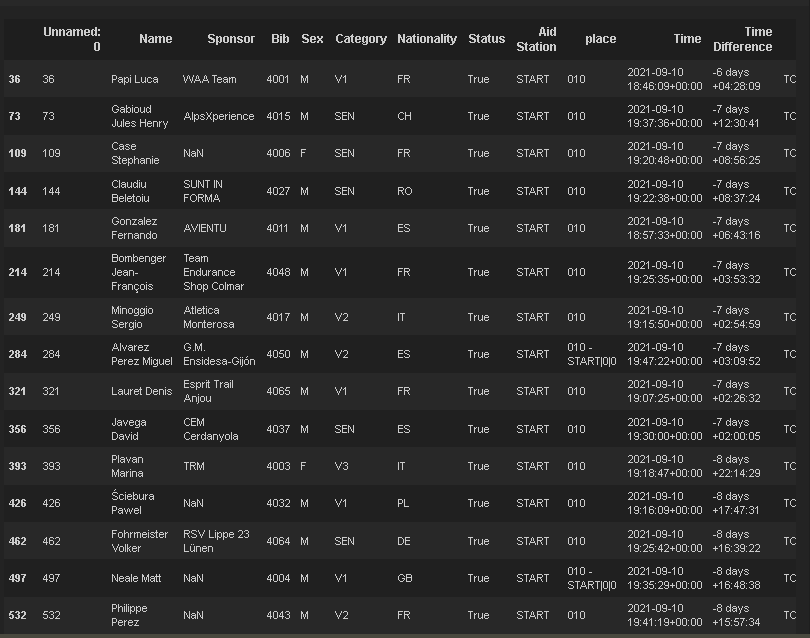

### Adding dates into TOR330 and TOR4450

In [ ]:
pivoted_TOR330['Year'] = pivoted_TOR330['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# have I dropped any rows?
print(pivoted_TOR330.shape)

# Merging on two columns: 'Race' and 'Year'
pivoted_TOR330_dates = pd.merge(pivoted_TOR330, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(pivoted_TOR330_dates.shape)



In [ ]:

pivoted_TOR330_dates['new_Start Date'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        pivoted_TOR330_dates['Start Date'], 
        pivoted_TOR330_dates['Start Date'] + pd.to_timedelta('02:00:00'))

pivoted_TOR330_dates['Wave'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        'Wave1', 
        'Wave2')

pivoted_TOR330_dates[pivoted_TOR330_dates['Bib']> 1001].head()

In [ ]:
# Calculate Duration
pivoted_TOR330_dates['Duration'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['new_Start Date'] 

# Sort the DataFrame by the 'Duration' column
pivoted_TOR330_dates = pivoted_TOR330_dates.sort_values(by='Duration')


In [ ]:
# Reorder the columns in the correct order
pivoted_TOR330_dates = pivoted_TOR330_dates[[
        'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category', 'Status','Wave', 'Duration','RITIRIO',
        'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes',
        'Bivacco Zappelli', 'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
        'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
        'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
        'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
        'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
        'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
        'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
        'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
        'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
        'Bivacco R. Clermont', 'Oyace IN', 'Bruson Arp', 'Col Brison',
        'Berio Damon', 'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon',
        'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts',
        'Monte de la Saxe', 'FINISH'
]]

In [ ]:
print(pivoted_TOR330_dates['Duration'][pivoted_TOR330_dates['Name'].str.contains('Jonina')])
print(TORX_duv_df['Performance'][TORX_duv_df['Name'].str.contains('Jonina')])
# Finished in 144:46:43 hours and 

In [ ]:
# Group by 'Status' and count occurrences in each group
status_counts = pivoted_TOR330_dates.groupby('Status')['Status'].count()

# Display the counts
print(status_counts)


In [ ]:
for i in pivoted_TOR330_dates.columns: 
    print(i, pivoted_TOR330_dates[i].isna().sum())

### Only Finishers

In [ ]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[(pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()


for i in pivoted_TOR330_dates_noDNF.columns: 
    print(i, pivoted_TOR330_dates_noDNF[i].isna().sum())


In [ ]:
pivoted_TOR330_dates.groupby(['Wave', 'Status'])['Status'].size()

In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(pivoted_TOR330_dates['Bib'], bins=7, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Bibs')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

### Cleaning DNFs 

In [ ]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[
                    # selecting all rows that DNFed
                    (pivoted_TOR330_dates['Status'] == False) & # AND
                    # selecting all rows where FINISH does not have a time
                    (pivoted_TOR330_dates['FINISH'].isna())]

pivoted_TOR330_dates_DNF.head()

In [ ]:
pivoted_TOR330_dates_DNF.isna().sum()

### What is the last place of DNFs?

In [ ]:
# Function to find the last non-blank column
def get_last_non_blank(row):
    for col in reversed(row.index):
        if pd.notna(row[col]):  # Check if the value is not NaN
#             print(col)
            return col
#     return None  # In case all columns are blank

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates_DNF['Retired'] = pivoted_TOR330_dates_DNF.apply(get_last_non_blank, axis=1)


In [ ]:
pivoted_TOR330_dates_DNF.columns

In [ ]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates_DNF[['Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Wave', 'Duration', 'RITIRIO', 'Retired','new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Bivacco Zappelli',
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace IN',
       'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
       'FINISH']]

# pivoted_TOR330_dates_DNF.to_excel('retired_df.xlsx', index = False)


### Cleaning Last location

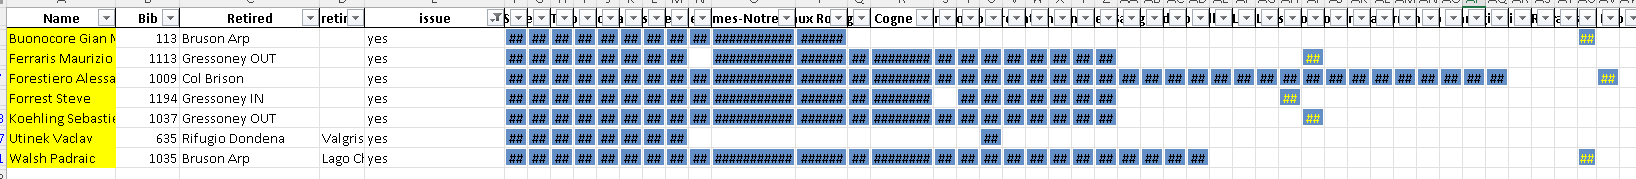


In [ ]:
names_that_DNFed_and_then_popped_up_miles_away =['Utinek Vaclav', 'Walsh Padraic',
                                                'Ferraris Maurizio', 'Buonocore Gian Mario',
                                                'Forestiero Alessandro', 'Forrest Steve',
                                                 'Koehling Sebastien'
                                                ]

In [ ]:
pivot_DNF = pivoted_TOR330_dates_DNF.copy()

# Ensure you're modifying the original DataFrame directly
for index, row in pivot_DNF[pivot_DNF['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
    retired_column = row['Retired']  # Get the column name in 'Retired'
    
    # Check if the 'Retired' value is a valid column in the specified list
    if retired_column in [
   'Rifugio Dondena', 'Gressoney IN', 'Gressoney OUT', 'Col Brison',  'Bruson Arp',
    ]:
        # Update the specific cell for the 'retired_column'
        pivot_DNF.at[index, retired_column] = pd.NaT

# Display the updated DataFrame
pivot_DNF[['Name',
   'Rifugio Dondena', 'Gressoney IN', 'Gressoney OUT', 'Col Brison',  'Bruson Arp',
       'Retired']][pivot_DNF['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]

In [ ]:
# Drop the intermediate columns if they're no longer needed
pivot_DNF = pivot_DNF.drop(columns=['Retired'])    

# Apply the function to each row and assign the result to 'Retired'
pivot_DNF['Retired'] = pivot_DNF.apply(get_last_non_blank, axis=1)



In [ ]:
pivot_DNF.head()

In [ ]:
# Display the updated DataFrame
pivot_DNF[['Name',
   'Rifugio Dondena', 'Gressoney IN', 'Gressoney OUT', 'Col Brison',  'Bruson Arp',
       'Retired']][pivot_DNF['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]


In [ ]:
section1 = ['Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
            'Bivacco Zappelli', 'Planaval', 'Valgrisenche IN']
section2 = [ 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
            'Eaux Rousse', 'Rifugio Sella', 'Cogne IN']

section3 = ['Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas IN']
section4  = ['Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
            'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
            'Niel La Gruba', 'Loo', 'Gressoney IN']

section5 = ['Gressoney OUT','Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche IN'] 

section6 = ['Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
            'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace IN',
            'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN']
        
section7 = ['Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
            'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
            'FINISH']

# finding the low / high season by date
pivot_DNF.loc[pivot_DNF['Retired'].isin(section1), 'Retired_Section'] = 'Retired during Section 1'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section2), 'Retired_Section'] = 'Retired during Section 2'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section3), 'Retired_Section'] = 'Retired during Section 3'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section4), 'Retired_Section'] = 'Retired during Section 4'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section5), 'Retired_Section'] = 'Retired during Section 5'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section6), 'Retired_Section'] = 'Retired during Section 6'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section7), 'Retired_Section'] = 'Retired during Section 7'


In [ ]:
pivot_DNF.groupby('Retired_Section')['Retired_Section'].count()

In [ ]:
counting_retired_section_and_wave = pivot_DNF.groupby(['Retired_Section', 'Wave'] ).size().to_frame()

# Reset the index to make it more readable
counting_retired_section_and_wave.index = pd.MultiIndex.from_tuples(counting_retired_section_and_wave.index, 
                                            names=["Retired_Section", "Wave"])

# Unstack the Wave level to create columns for Wave1 and Wave2
counting_retired_section_and_wave = counting_retired_section_and_wave.unstack(level="Wave")

# Display the result
counting_retired_section_and_wave.reset_index(drop =  False)

counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)


In [ ]:
# counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)
counting_retired_section_and_wave['Total'] = counting_retired_section_and_wave['Wave1'] +counting_retired_section_and_wave['Wave2']

counting_retired_section_and_wave['Wave1_%'] = counting_retired_section_and_wave['Wave1']/counting_retired_section_and_wave['Total']
counting_retired_section_and_wave['Wave2_%'] = counting_retired_section_and_wave['Wave2']/counting_retired_section_and_wave['Total']

counting_retired_section_and_wave['Wave1_%'] = round(counting_retired_section_and_wave['Wave1_%']*100, 1)
counting_retired_section_and_wave['Wave2_%']= round(counting_retired_section_and_wave['Wave2_%']*100, 2)

counting_retired_section_and_wave

In [ ]:
# DNS?
pivot_DNF[pivoted_TOR330_dates_DNF['Retired'] == 'new_Start Date']

In [ ]:
# Group by 'Status' and count occurrences in each group
pivot_DNF.groupby('Retired')['Retired'].count()

In [ ]:
pivot_DNF = pivot_DNF[['Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Wave', 'Duration', 'RITIRIO', 'Retired', 'Retired_Section', 'new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Bivacco Zappelli',
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace IN',
       'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
       'FINISH']]

### Calculating the Times for each section

In [ ]:
pivoted_TOR330_dates['Section1 Time'] = pivoted_TOR330_dates['Valgrisenche IN'] - pivoted_TOR330_dates['new_Start Date']
pivoted_TOR330_dates['Time Spent in Valgrisenche'] = pivoted_TOR330_dates['Valgrisenche OUT'] - pivoted_TOR330_dates['Valgrisenche IN']

pivoted_TOR330_dates['Section2 Time'] = pivoted_TOR330_dates['Cogne IN'] - pivoted_TOR330_dates['Valgrisenche OUT']
pivoted_TOR330_dates['Time Spent in Cogne'] = pivoted_TOR330_dates['Cogne OUT'] - pivoted_TOR330_dates['Cogne IN']


pivoted_TOR330_dates['Section3 Time'] = pivoted_TOR330_dates['Donnas IN'] - pivoted_TOR330_dates['Cogne OUT']
pivoted_TOR330_dates['Time Spent in Donnas'] = pivoted_TOR330_dates['Donnas OUT'] - pivoted_TOR330_dates['Donnas IN']


pivoted_TOR330_dates['Section4 Time'] = pivoted_TOR330_dates['Gressoney IN'] - pivoted_TOR330_dates['Donnas OUT']
pivoted_TOR330_dates['Time Spent in Gressoney'] = pivoted_TOR330_dates['Gressoney OUT'] - pivoted_TOR330_dates['Gressoney IN']

pivoted_TOR330_dates['Section5 Time'] = pivoted_TOR330_dates['Valtournenche IN'] - pivoted_TOR330_dates['Gressoney OUT']
pivoted_TOR330_dates['Time Spent in Valtournenche'] = pivoted_TOR330_dates['Valtournenche OUT'] - pivoted_TOR330_dates['Valtournenche IN']

pivoted_TOR330_dates['Section6 Time'] = pivoted_TOR330_dates['Ollomont IN'] - pivoted_TOR330_dates['Valtournenche OUT']
pivoted_TOR330_dates['Time Spent in Ollomont'] = pivoted_TOR330_dates['Ollomont OUT'] - pivoted_TOR330_dates['Ollomont IN']

pivoted_TOR330_dates['Section7 Time'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['Ollomont OUT']

In [ ]:
pivoted_TOR330_dates.to_excel('TOR330 Data/TOR330_2023_aid_stations.xlsx' )

In [ ]:
pivoted_TOR330_dates.head()

In [ ]:
sub_pivoted_TOR330_dates= pivoted_TOR330_dates[[
            'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
            'Status', 'Wave','RITIRIO', 'Retired', 'Duration', 'new_Start Date', 
            'Valgrisenche IN', 'Valgrisenche OUT', 
             'Cogne IN','Cogne OUT', 

            'Donnas IN', 'Donnas OUT', 
            'Gressoney IN', 'Gressoney OUT',

            'Valtournenche IN', 'Valtournenche OUT', 
            'Ollomont IN','Ollomont OUT', 
            'FINISH',

            #####
            'Section1 Time', 'Time Spent in Valgrisenche',
            'Section2 Time', 'Time Spent in Cogne', 'Section3 Time',
            'Time Spent in Donnas', 'Section4 Time', 'Time Spent in Gressoney',
            'Section5 Time', 'Time Spent in Valtournenche', 'Section6 Time',
            'Time Spent in Ollomont', 'Section7 Time'
    
]]

sub_pivoted_TOR330_dates[sub_pivoted_TOR330_dates['Status'] == True].isna().sum()

In [ ]:
pivot_DNF = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False]
pivot_noDNF = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == True]

# Examining the statistics TIMES for each section
for section in [ 'Section1 Time', 'Time Spent in Valgrisenche',
            'Section2 Time', 'Time Spent in Cogne', 'Section3 Time',
            'Time Spent in Donnas', 'Section4 Time', 'Time Spent in Gressoney',
            'Section5 Time', 'Time Spent in Valtournenche', 'Section6 Time',
            'Time Spent in Ollomont', 'Section7 Time']: 
    print(section.upper(), '\n',pivoted_noDNF[section].describe(),'\n', '*'*20)

In [ ]:
### One guy stayed in  Valgrisenche for 7 hours... I thought it was an error... but nope it is actually geniune!
pivot_DNF[pivot_DNF['Time Spent in Valgrisenche'] == pivot_DNF['Time Spent in Valgrisenche'].max()]

In [ ]:
### I thought that was IMPOSSIBLE to do Section 3 in less than 12 hours...
# Again I was wrong!

pivot_noDNF[pivot_noDNF['Section4 Time'] == pivot_noDNF['Section4 Time'].min()]

In [ ]:
# creating histograms to examine the time of people who finished 
for section in [            'Section1 Time', 'Time Spent in Valgrisenche',
            'Section2 Time', 'Time Spent in Cogne', 'Section3 Time',
            'Time Spent in Donnas', 'Section4 Time', 'Time Spent in Gressoney',
            'Section5 Time', 'Time Spent in Valtournenche', 'Section6 Time',
            'Time Spent in Ollomont', 'Section7 Time']: 
    section_time = [t.total_seconds() / 3600 for t in pivot_noDNF[section]]

    max_Performance = max(section_time)
    min_Performance =  min(section_time)
    Performance_bins = int(max_Performance- min_Performance)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(section_time, bins=Performance_bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {section}')
    plt.xlabel('Hours')
    plt.ylabel('Frequency')
    plt.show()